In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Observing and cleaning the data

In [2]:
data = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [5]:
# removing row with "Other" gender
data = data.drop(data[data['gender']=='Other'].index)

In [6]:
data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [7]:
# counting rows with null values in it
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# calculating average bmi (mean)
print(data['bmi'].mean())

28.894559902200488


In [9]:
# filling null values in bmi column with the bmi mean
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

In [10]:
# checking for nulls again
data['bmi'].isnull().sum()

0

In [11]:
# creating new dataframe with stroke and no stroke counts (0 = no stroke, 1 = stroke)
stroke_count_df = pd.DataFrame(data.groupby('stroke')['stroke'].count())
stroke_count_df

,stroke
stroke,
0,4860
1,249


C:\Users\Peter\Documents\Workspace\aai\aai-mandatory-1\.venv\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


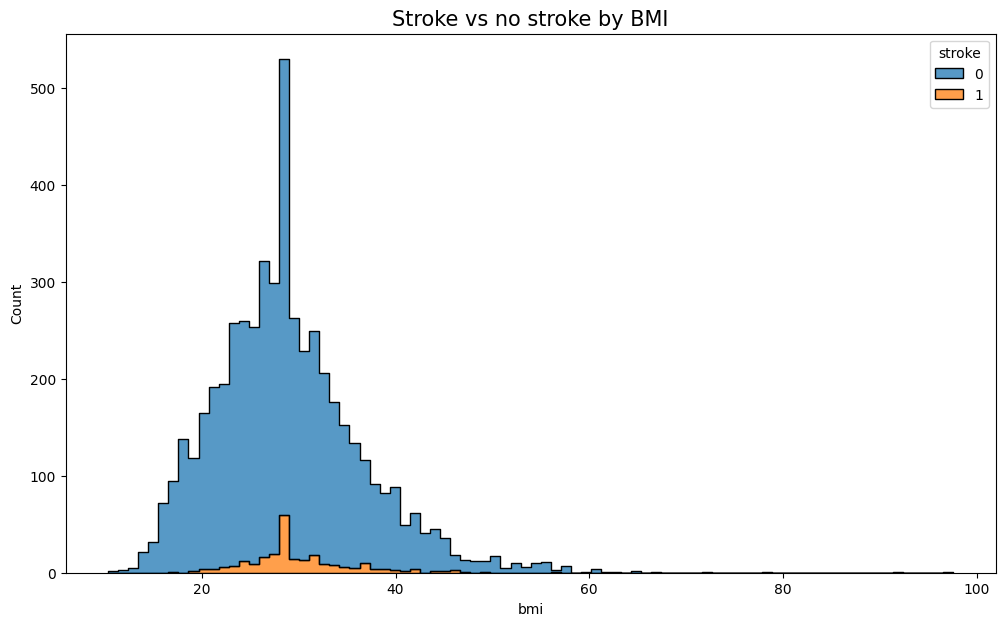

In [12]:
# plotting density distribution of bmi for stroke and no-stroke 
plt.figure(figsize=(12,7))
seaborn.histplot(
    data, x="bmi", hue="stroke",
    element="step",
    multiple='stack'
)
plt.title('Stroke vs no stroke by BMI', fontsize=15)
plt.show()

C:\Users\Peter\Documents\Workspace\aai\aai-mandatory-1\.venv\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


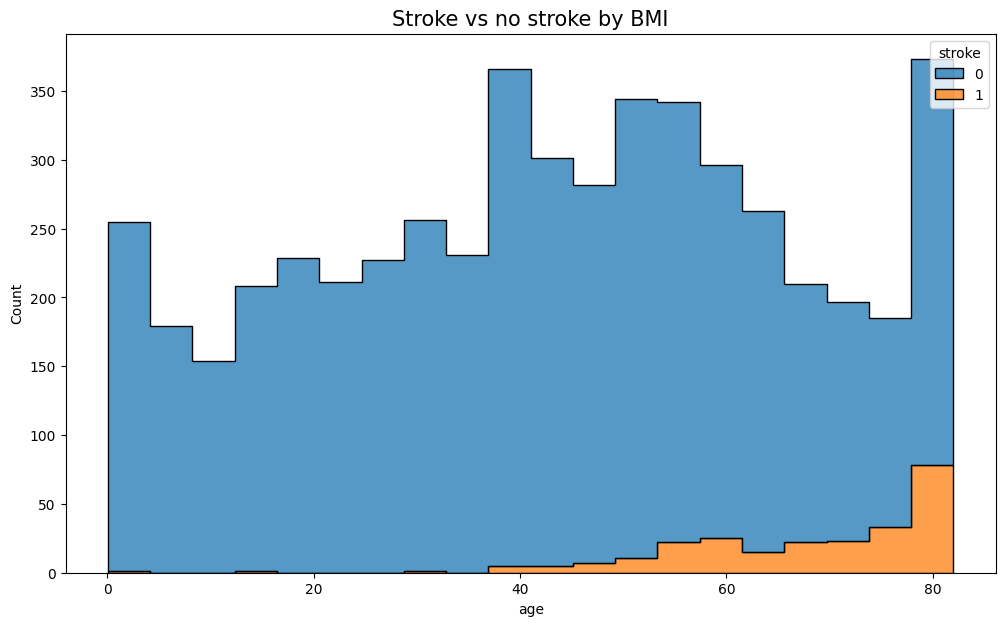

In [13]:
# plotting density distribution of bmi for stroke and no-stroke 
plt.figure(figsize=(12,7))
seaborn.histplot(
    data, x="age", hue="stroke",
    element="step",
    multiple='stack'
)
plt.title('Stroke vs no stroke by BMI', fontsize=15)
plt.show()

C:\Users\Peter\Documents\Workspace\aai\aai-mandatory-1\.venv\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


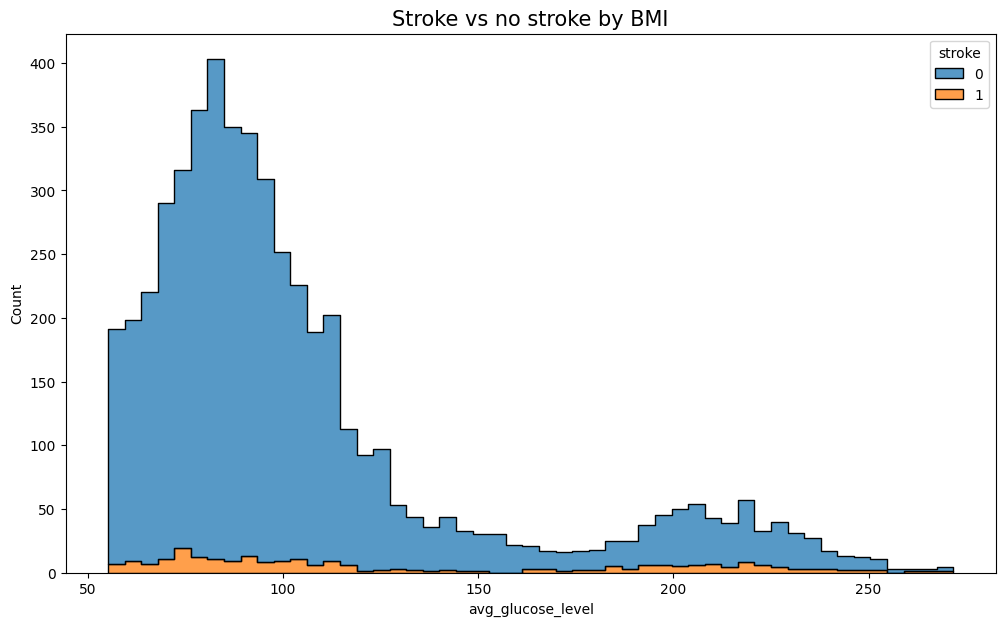

In [14]:
# plotting density distribution of bmi for stroke and no-stroke 
plt.figure(figsize=(12,7))
seaborn.histplot(
    data, x="avg_glucose_level", hue="stroke",
    element="step",
    multiple='stack'
)
plt.title('Stroke vs no stroke by BMI', fontsize=15)
plt.show()

In [15]:
print(stats.pearsonr(x=data['bmi'],y=data['stroke'], alternative='less'))

PearsonRResult(statistic=0.03891685046419615, pvalue=0.9972991090785829)


In [16]:
print(stats.pearsonr(x=data['age'],y=data['stroke']))

PearsonRResult(statistic=0.24523875623198607, pvalue=7.435468822674816e-71)


In [17]:
print(stats.pearsonr(x=data['avg_glucose_level'],y=data['stroke']))

PearsonRResult(statistic=0.13199119156646016, pvalue=2.705302697189168e-21)


In [18]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [19]:
obj_cols=['gender', 'ever_married', 'Residence_type']

lb=LabelEncoder()

for i in obj_cols:
    print(f"Value Counts of column:{i}")
    print(data.loc[:,i].value_counts())
    data[i] = lb.fit_transform(data[i])
    print("The classes which labeled from 0 are: ",lb.classes_,end="\n===========================================\n")

Value Counts of column:gender
Female    2994
Male      2115
Name: gender, dtype: int64
The classes which labeled from 0 are:  ['Female' 'Male']
Value Counts of column:ever_married
Yes    3353
No     1756
Name: ever_married, dtype: int64
The classes which labeled from 0 are:  ['No' 'Yes']
Value Counts of column:Residence_type
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64
The classes which labeled from 0 are:  ['Rural' 'Urban']


In [20]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.60000,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,28.89456,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.50000,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.40000,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.00000,never smoked,1


In [21]:
print(stats.spearmanr(a=data['gender'],b=data['stroke']))

SpearmanrResult(correlation=0.009080600160079336, pvalue=0.5163958663824182)


In [22]:
print(stats.spearmanr(a=data['ever_married'],b=data['stroke'], alternative='less'))

SpearmanrResult(correlation=0.10829931566075394, pvalue=0.9999999999999958)


In [23]:
print(stats.spearmanr(a=data['hypertension'],b=data['stroke'], alternative='less'))

SpearmanrResult(correlation=0.12789125912919305, pvalue=1.0)


In [24]:
print(stats.spearmanr(a=data['heart_disease'],b=data['stroke'], alternative='less'))

SpearmanrResult(correlation=0.13490484180042858, pvalue=1.0)


In [25]:
print(stats.spearmanr(a=data['Residence_type'],b=data['stroke'], alternative='less'))

SpearmanrResult(correlation=0.015414584210315819, pvalue=0.864679635040432)


In [26]:
print(stats.spearmanr(a=data['bmi'],b=data['stroke']))

SpearmanrResult(correlation=0.05496392928607472, pvalue=8.470538891237322e-05)


In [27]:
print(stats.spearmanr(a=data['age'], b=data['stroke'], axis=None))

SpearmanrResult(correlation=0.24953042293208674, pvalue=2.2674207298102072e-73)


In [28]:
test_bmi = (data['bmi']-np.min(data['bmi']))/(np.max(data['bmi'])-np.min(data['bmi']))

In [29]:
data = pd.get_dummies(data)

In [30]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.60000,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.89456,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.50000,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.40000,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.00000,1,0,0,0,1,0,0,0,1,0


In [31]:
print(stats.spearmanr(a=data['smoking_status_smokes'],b=data['stroke']))

SpearmanrResult(correlation=0.008920477479368813, pvalue=0.5238200265767476)


# Data resambling to improve imbalanced data

0    4860
1     249
Name: stroke, dtype: int64


<AxesSubplot: >

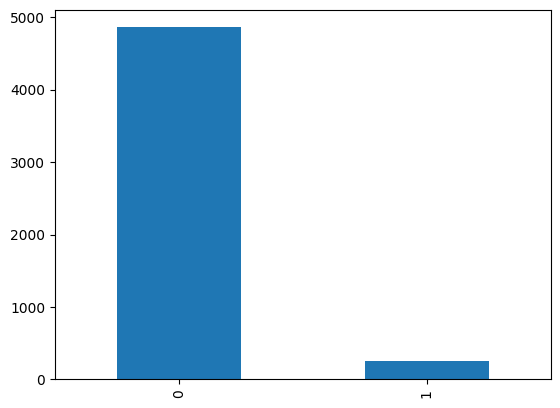

In [32]:
print(data['stroke'].value_counts())
data['stroke'].value_counts().sort_index().plot.bar()

In [33]:
data = data.drop('id', axis=1)
y = data['stroke']
X = data.drop('stroke', axis=1)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3831, 17) (1278, 17)
(3831,) (1278,)


In [35]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
print('Stroke counts before resampling:')
print(pd.DataFrame(y_train, columns=['stroke']).value_counts())

Stroke counts before resampling:
stroke
0         3662
1          169
dtype: int64


In [37]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=2022)
X_train, y_train = oversample.fit_resample(X_train, y_train.ravel())
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7324, 17) (1278, 17)
(7324,) (1278,)


In [38]:
print('Stroke counts after resampling:')
print(pd.DataFrame(y_train, columns=['stroke']).value_counts())

Stroke counts after resampling:
stroke
0         3662
1         3662
dtype: int64


In [39]:
X_train_bmi = np.array(X_train[:, [data.columns.get_loc('bmi')]]).reshape(-1, 1)
X_test_bmi  = np.array(X_test[:, [data.columns.get_loc('bmi')]]).reshape(-1, 1)
print(X_train_bmi.shape)
print(X_test_bmi.shape)
# X_train_bmi = np.array(X_train['bmi']).reshape(-1, 1)
# X_test_bmi  = np.array(X_train['bmi']).reshape(-1, 1)
# print(X_train_bmi.shape)
# print(X_test_bmi.shape)

(7324, 1)
(1278, 1)


# Preparing model evaluation functions

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [41]:
def plot_conf_mat(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)

    group_names = ['TN', 'FP', 'FN', 'TP']
    group_counts = ['{0:0.0f}'.format(value) for value in conf_mat.flatten()]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(8,8))
    seaborn.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues')
    plt.show()

In [42]:
def report_performance(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Accuracy score: {accuracy}')
    print(f'Precision score: {precision}')
    print(f'Recall score: {recall}')
    print('______________________________')
    print()
    print('Full report:')
    print(classification_report(y_test, y_pred))

# Stochastic Gradient Descent Classifier

In [43]:
from sklearn.linear_model import SGDClassifier

## Single feature (BMI)

In [44]:
model = SGDClassifier()
model.fit(X_train_bmi, y_train)

SGDClassifier()

In [45]:
y_pred = model.predict(X_test_bmi)

In [46]:
print(y_test.shape)

(1278,)


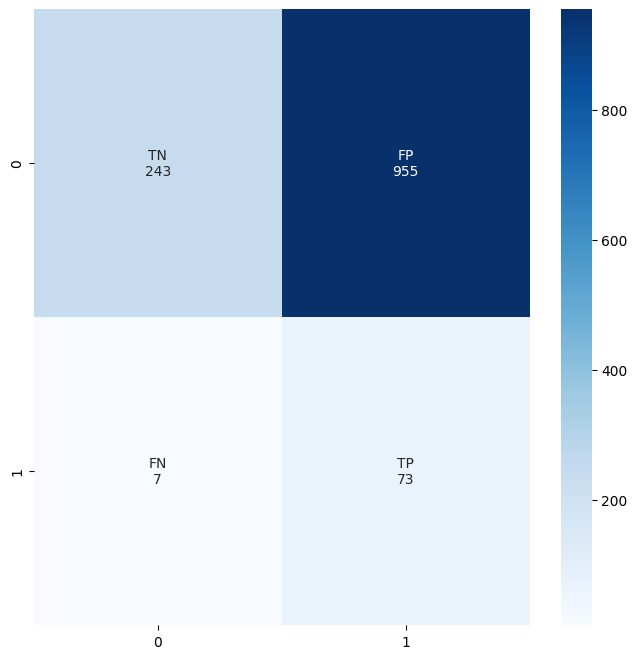

In [47]:
plot_conf_mat(y_test, y_pred)

In [48]:
report_performance(y_test, y_pred)

Accuracy score: 0.24726134585289514
Precision score: 0.07101167315175097
Recall score: 0.9125
______________________________

Full report:
              precision    recall  f1-score   support

           0       0.97      0.20      0.34      1198
           1       0.07      0.91      0.13        80

    accuracy                           0.25      1278
   macro avg       0.52      0.56      0.23      1278
weighted avg       0.92      0.25      0.32      1278



## All features

In [49]:
del model
model = SGDClassifier()
model.fit(X_train, y_train)

SGDClassifier()

In [50]:
y_pred = model.predict(X_test)

In [51]:
print(X_train.shape)

(7324, 17)


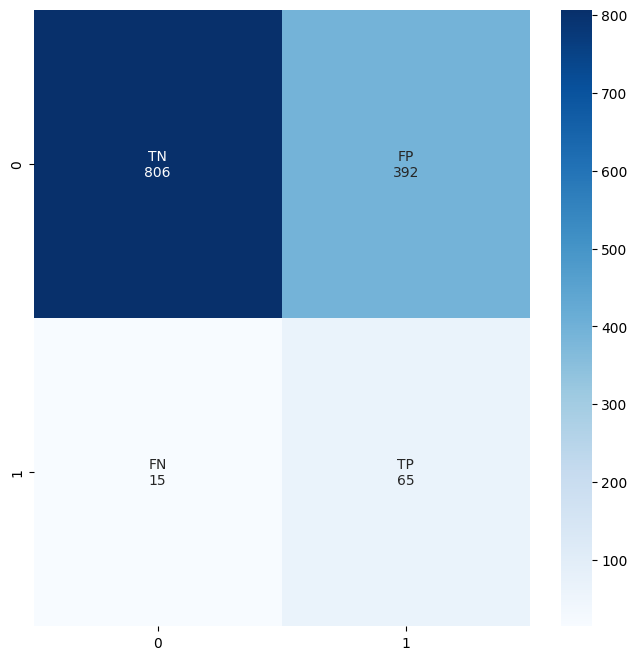

In [52]:
plot_conf_mat(y_test, y_pred)

In [53]:
report_performance(y_test, y_pred)

Accuracy score: 0.6815336463223787
Precision score: 0.1422319474835886
Recall score: 0.8125
______________________________

Full report:
              precision    recall  f1-score   support

           0       0.98      0.67      0.80      1198
           1       0.14      0.81      0.24        80

    accuracy                           0.68      1278
   macro avg       0.56      0.74      0.52      1278
weighted avg       0.93      0.68      0.76      1278



# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

## Single feature (BMI)

In [55]:
del model
model = LogisticRegression(max_iter=300)
model.fit(X_train_bmi, y_train)

LogisticRegression(max_iter=300)

In [56]:
y_pred = model.predict(X_test_bmi)

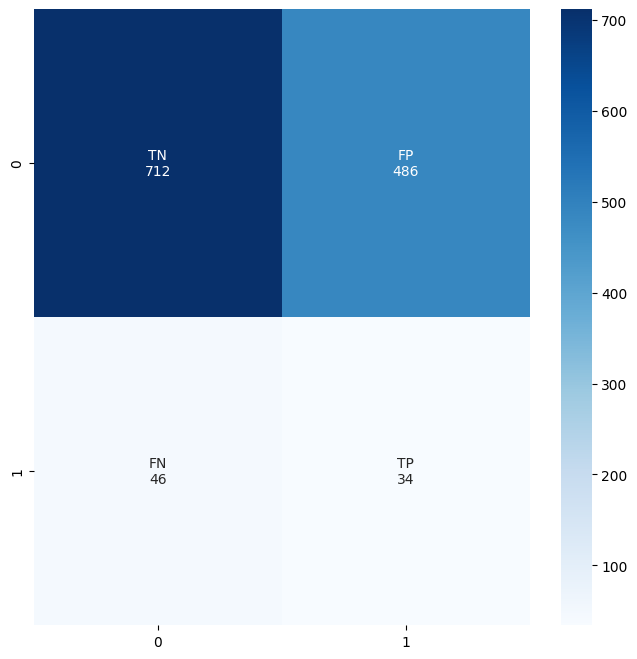

In [57]:
plot_conf_mat(y_test, y_pred)

In [58]:
report_performance(y_test, y_pred)

Accuracy score: 0.5837245696400626
Precision score: 0.06538461538461539
Recall score: 0.425
______________________________

Full report:
              precision    recall  f1-score   support

           0       0.94      0.59      0.73      1198
           1       0.07      0.42      0.11        80

    accuracy                           0.58      1278
   macro avg       0.50      0.51      0.42      1278
weighted avg       0.88      0.58      0.69      1278



## All features

In [59]:
del model
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [60]:
y_pred = model.predict(X_test)

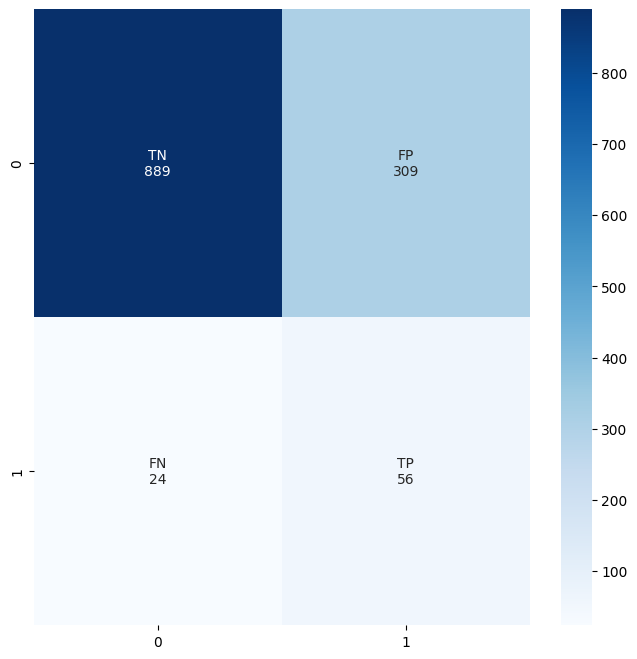

In [61]:
plot_conf_mat(y_test, y_pred)

In [62]:
report_performance(y_test, y_pred)

Accuracy score: 0.7394366197183099
Precision score: 0.15342465753424658
Recall score: 0.7
______________________________

Full report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84      1198
           1       0.15      0.70      0.25        80

    accuracy                           0.74      1278
   macro avg       0.56      0.72      0.55      1278
weighted avg       0.92      0.74      0.81      1278



# Decision Tree Classification

In [63]:
from sklearn.tree import DecisionTreeClassifier

## Single feature (BMI)

In [64]:
del model
model = DecisionTreeClassifier()
model.fit(X_train_bmi, y_train)

DecisionTreeClassifier()

In [65]:
y_pred = model.predict(X_test_bmi)

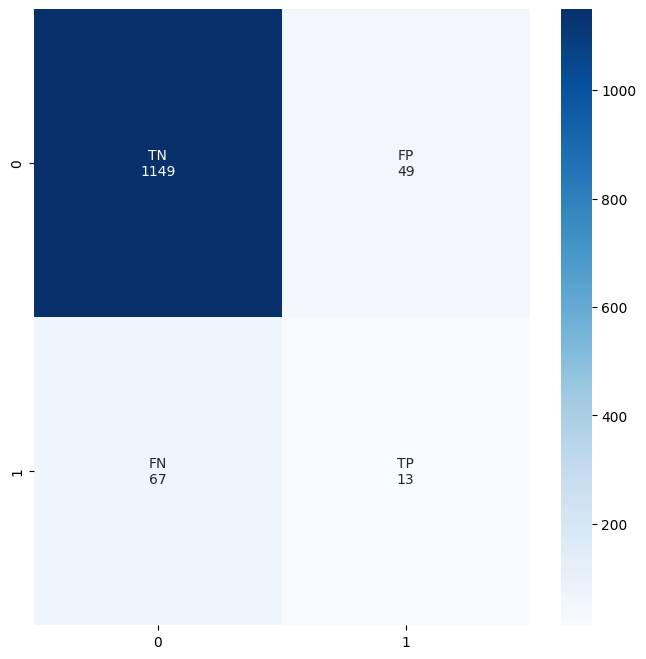

In [66]:
plot_conf_mat(y_test, y_pred)

In [67]:
report_performance(y_test, y_pred)

Accuracy score: 0.9092331768388107
Precision score: 0.20967741935483872
Recall score: 0.1625
______________________________

Full report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1198
           1       0.21      0.16      0.18        80

    accuracy                           0.91      1278
   macro avg       0.58      0.56      0.57      1278
weighted avg       0.90      0.91      0.90      1278



## All features

In [68]:
#del model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [69]:
y_pred = model.predict(X_test)

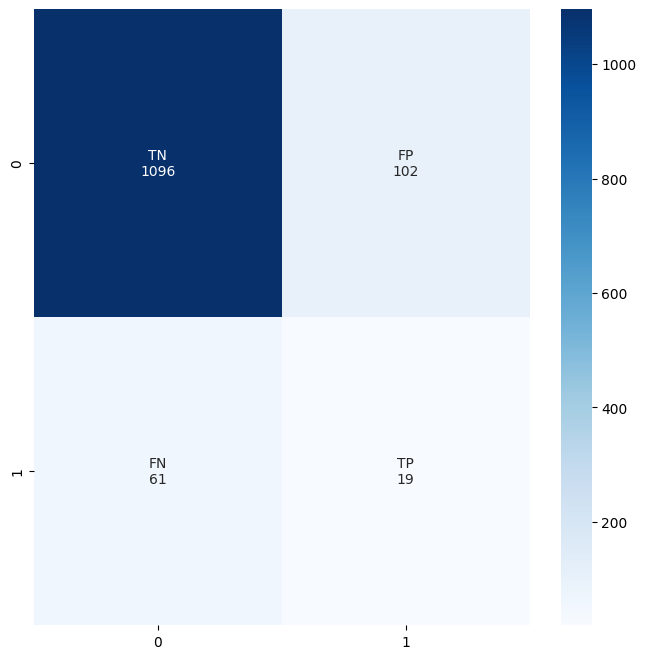

In [70]:
plot_conf_mat(y_test, y_pred)

In [71]:
report_performance(y_test, y_pred)

Accuracy score: 0.8724569640062598
Precision score: 0.15702479338842976
Recall score: 0.2375
______________________________

Full report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1198
           1       0.16      0.24      0.19        80

    accuracy                           0.87      1278
   macro avg       0.55      0.58      0.56      1278
weighted avg       0.90      0.87      0.88      1278



# Random Forest Classification

In [72]:
from sklearn.ensemble import RandomForestClassifier

## Single feature (BMI)

In [73]:
del model
model = RandomForestClassifier()
model.fit(X_train_bmi, y_train)

RandomForestClassifier()

In [74]:
y_pred = model.predict(X_test_bmi)

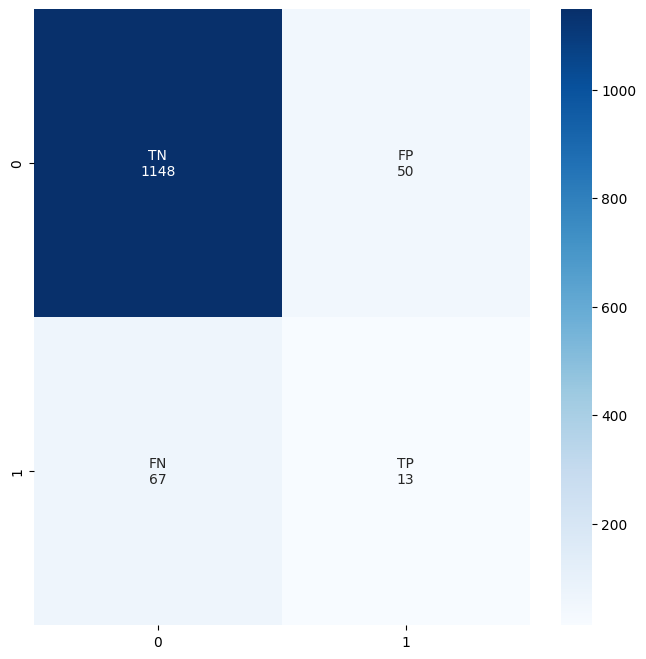

In [75]:
plot_conf_mat(y_test, y_pred)

In [76]:
report_performance(y_test, y_pred)

Accuracy score: 0.9084507042253521
Precision score: 0.20634920634920634
Recall score: 0.1625
______________________________

Full report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1198
           1       0.21      0.16      0.18        80

    accuracy                           0.91      1278
   macro avg       0.58      0.56      0.57      1278
weighted avg       0.90      0.91      0.90      1278



## All features

In [77]:
del model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
y_pred = model.predict(X_test)

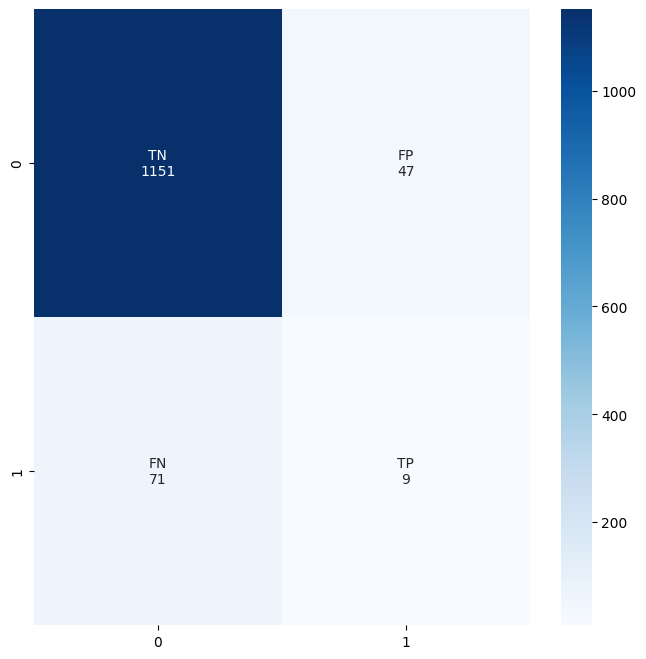

In [79]:
plot_conf_mat(y_test, y_pred)

In [80]:
report_performance(y_test, y_pred)

Accuracy score: 0.9076682316118936
Precision score: 0.16071428571428573
Recall score: 0.1125
______________________________

Full report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1198
           1       0.16      0.11      0.13        80

    accuracy                           0.91      1278
   macro avg       0.55      0.54      0.54      1278
weighted avg       0.89      0.91      0.90      1278



# Splitting data again to get validation data for a DNN

In [81]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(5859, 17)
(1465, 17)
(1278, 17)


In [82]:
X_train_bmi = np.array(X_train[:, [data.columns.get_loc('bmi')]]).reshape(-1, 1)
X_val_bmi  = np.array(X_val[:, [data.columns.get_loc('bmi')]]).reshape(-1, 1)
print(X_train_bmi.shape)
print(X_val_bmi.shape)
print(X_test_bmi.shape)

(5859, 1)
(1465, 1)
(1278, 1)


# DNN (Deep Neural Network)

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall, AUC

In [84]:
accuracy = BinaryAccuracy(name = 'accuracy')
precision = Precision(name = 'precision')
recall = Recall(name = 'recall')
auc = AUC(name = 'auc')

## Single feature (BMI)

In [85]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(1,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
        metrics=[
            accuracy,
            auc])

In [86]:
epochs = 25

In [87]:
history = model.fit(X_train_bmi, y_train,
             validation_data=(X_val_bmi, y_val),
             epochs=epochs,
             batch_size=32)

Epoch 1/25
184/184 [==============================] - 1s 2ms/step - loss: 0.6838 - accuracy: 0.5585 - auc: 0.5819 - val_loss: 0.6707 - val_accuracy: 0.5386 - val_auc: 0.6136
Epoch 2/25
184/184 [==============================] - 0s 1ms/step - loss: 0.6365 - accuracy: 0.6209 - auc: 0.6603 - val_loss: 0.6310 - val_accuracy: 0.6184 - val_auc: 0.6734
Epoch 3/25
184/184 [==============================] - 0s 1ms/step - loss: 0.6260 - accuracy: 0.6296 - auc: 0.6740 - val_loss: 0.6309 - val_accuracy: 0.6273 - val_auc: 0.6752
Epoch 4/25
184/184 [==============================] - 0s 1ms/step - loss: 0.6227 - accuracy: 0.6320 - auc: 0.6813 - val_loss: 0.6301 - val_accuracy: 0.6116 - val_auc: 0.6709
Epoch 5/25
184/184 [==============================] - 0s 1ms/step - loss: 0.6253 - accuracy: 0.6337 - auc: 0.6740 - val_loss: 0.6262 - val_accuracy: 0.6253 - val_auc: 0.6782
Epoch 6/25
184/184 [==============================] - 0s 1ms/step - loss: 0.6223 - accuracy: 0.6371 - auc: 0.6783 - val_loss: 0.63

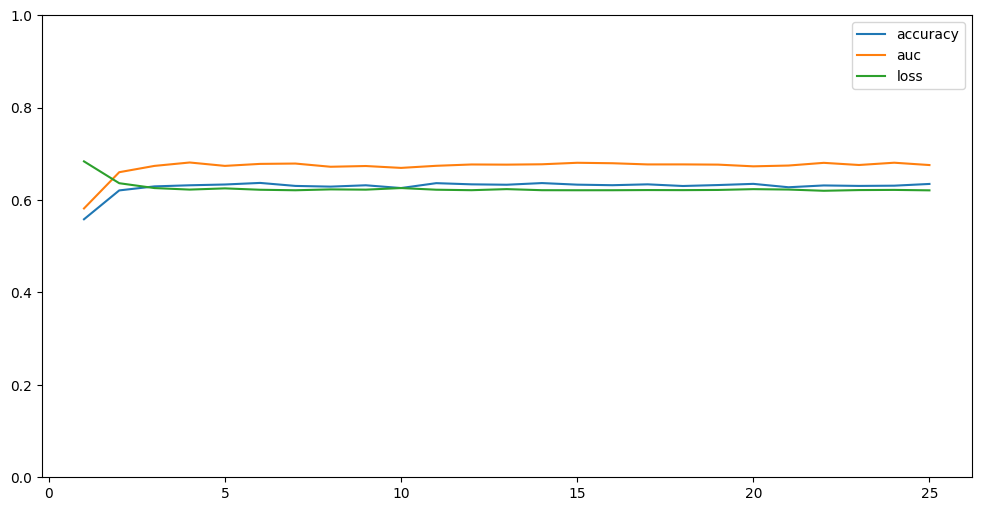

In [88]:
n_epoch = range(1,26)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='auc', label='auc')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

In [89]:
model.evaluate(X_test_bmi, y_test)

40/40 [==============================] - 0s 796us/step - loss: 0.6078 - accuracy: 0.5548 - auc: 0.6129


[0.6078187227249146, 0.5547730922698975, 0.6128599643707275]

## All features

In [107]:
from keras.regularizers import l2

In [108]:
del model
del history

In [109]:
model = Sequential()
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01), input_shape=(17,)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam', 
    loss='binary_crossentropy',
    metrics=[
        accuracy,
        auc])

In [110]:
epochs = 150

In [111]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=epochs,
             batch_size=32)

Epoch 1/250
184/184 [==============================] - 1s 2ms/step - loss: 0.9747 - accuracy: 0.6665 - auc: 0.7212 - val_loss: 0.7750 - val_accuracy: 0.7584 - val_auc: 0.8315
Epoch 2/250
184/184 [==============================] - 0s 985us/step - loss: 0.6943 - accuracy: 0.7443 - auc: 0.8050 - val_loss: 0.6078 - val_accuracy: 0.7973 - val_auc: 0.8557
Epoch 3/250
184/184 [==============================] - 0s 985us/step - loss: 0.5967 - accuracy: 0.7754 - auc: 0.8387 - val_loss: 0.5651 - val_accuracy: 0.7877 - val_auc: 0.8627
Epoch 4/250
184/184 [==============================] - 0s 1ms/step - loss: 0.5668 - accuracy: 0.7974 - auc: 0.8401 - val_loss: 0.5325 - val_accuracy: 0.8068 - val_auc: 0.8666
Epoch 5/250
184/184 [==============================] - 0s 985us/step - loss: 0.5440 - accuracy: 0.7942 - auc: 0.8504 - val_loss: 0.5164 - val_accuracy: 0.8082 - val_auc: 0.8648
Epoch 6/250
184/184 [==============================] - 0s 985us/step - loss: 0.5352 - accuracy: 0.7967 - auc: 0.8498 - 

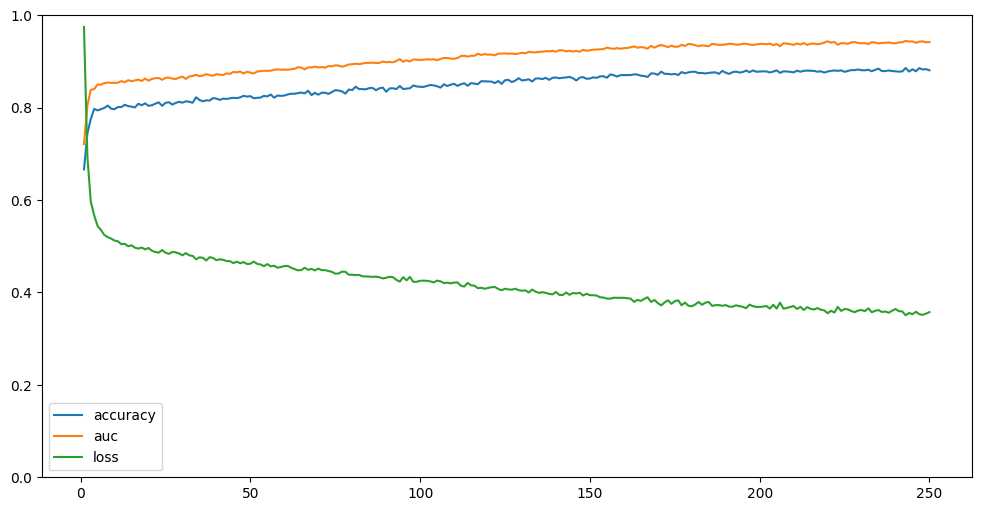

In [112]:
n_epoch = range(1,epochs+1)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
# seaborn.lineplot(data=history.history, x=n_epoch, y='precision', label='precision')
# seaborn.lineplot(data=history.history, x=n_epoch, y='recall', label='recall')
seaborn.lineplot(data=history.history, x=n_epoch, y='auc', label='auc')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

In [113]:
model.evaluate(X_test, y_test)

40/40 [==============================] - 0s 770us/step - loss: 0.4820 - accuracy: 0.7926 - auc: 0.7592


[0.48197123408317566, 0.792644739151001, 0.7591872811317444]

# First model with relu activation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(18,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=50,
           batch_size=32)

In [ ]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

# Second model with leaky relu activation

In [ ]:
del model

In [ ]:
del history

In [ ]:
model = Sequential()
model.add(Dense(32, activation='leaky_relu', input_shape=(18,)))
model.add(Dense(64, activation='leaky_relu'))
model.add(Dense(64, activation='leaky_relu'))
model.add(Dense(64, activation='leaky_relu'))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=50,
           batch_size=32)

In [ ]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

# Third model with dropout

In [ ]:
del model
del history

In [ ]:
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(18,)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=50,
             batch_size=32)

In [ ]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

# Trying model 3 again

In [ ]:
del model
del history

In [ ]:
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(18,)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=50,
             batch_size=32)

In [ ]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

# Trying model 1 again

In [ ]:
del model
del history

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(18,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=50,
             batch_size=32)

In [ ]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

# Trying smaller model

In [ ]:
del model

In [ ]:
del history

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(18,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=50,
             batch_size=32)

In [ ]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

# optimising

In [ ]:
del model
del history

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(18,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=50,
             batch_size=32)

In [ ]:
n_epoch = range(1,51)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

# Trying less layers

In [ ]:
del model
del history

In [ ]:
model = Sequential()
model.add(Dense(64, activation='leaky_relu', input_shape=(18,)))
model.add(Dense(128, activation='leaky_relu'))
model.add(Dense(64, activation='leaky_relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=75,
             batch_size=32)

In [ ]:
n_epoch = range(1,76)

plt.figure(figsize=(12,6))

seaborn.lineplot(data=history.history, x=n_epoch, y='accuracy', label='accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='loss', label='loss')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_accuracy', label='val accuracy')
seaborn.lineplot(data=history.history, x=n_epoch, y='val_loss', label='val loss')

plt.legend()
plt.ylim([0,1])
plt.ylabel(None)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

#  MISC

In [ ]:
def rf_feat_importance(model, data):
    return pd.DataFrame({'Feature':data.columns, 'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

fi = rf_feat_importance(model, X)
fi.style.background_gradient(cmap='Blues')